# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [18]:
df1 = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv')



Get rid of any _rows_ that have nans in them:

In [19]:
df1.dropna(axis = 0, how = 'any', inplace = True)

In [20]:
df1.head

<bound method NDFrame.head of              ID Case Number                    Date  \
0       4647776    HM172874  02/09/2006 10:29:07 PM   
1       4649196    HM157167  02/01/2006 12:30:27 PM   
2       4649661    HM159623  02/02/2006 07:02:12 PM   
3       4650448    HM158020  02/01/2006 08:13:00 PM   
4       4650940    HM156984  02/01/2006 10:10:00 AM   
5       4651151    HM161364  02/03/2006 04:40:00 PM   
6       4656683    HM161437  02/03/2006 04:30:00 PM   
7       4656759    HM161911  02/03/2006 08:00:00 PM   
8       4657274    HM159750  02/02/2006 07:30:00 PM   
9       4657315    HM159804  02/02/2006 06:50:00 PM   
10      4660220    HM259820  03/29/2006 03:35:00 PM   
11      4662776    HM168656  02/07/2006 05:20:00 PM   
12      4663539    HM166553  02/06/2006 03:18:40 PM   
13      4663794    HM263708  03/31/2006 01:00:00 PM   
14      4667660    HM172239  02/09/2006 03:45:24 PM   
15      4668207    HM146972  01/26/2006 10:05:00 PM   
16      4669202    HM168718  02/07/

Display the `dtypes` of your dset:

In [21]:
df1.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [22]:
df1.Date = pd.to_datetime(df1.Date)

In [17]:
df1.head

<bound method NDFrame.head of              ID Case Number                    Date  \
0       4647776    HM172874  02/09/2006 10:29:07 PM   
1       4649196    HM157167  02/01/2006 12:30:27 PM   
2       4649661    HM159623  02/02/2006 07:02:12 PM   
3       4650448    HM158020  02/01/2006 08:13:00 PM   
4       4650940    HM156984  02/01/2006 10:10:00 AM   
5       4651151    HM161364  02/03/2006 04:40:00 PM   
6       4656683    HM161437  02/03/2006 04:30:00 PM   
7       4656759    HM161911  02/03/2006 08:00:00 PM   
8       4657274    HM159750  02/02/2006 07:30:00 PM   
9       4657315    HM159804  02/02/2006 06:50:00 PM   
10      4660220    HM259820  03/29/2006 03:35:00 PM   
11      4662776    HM168656  02/07/2006 05:20:00 PM   
12      4663539    HM166553  02/06/2006 03:18:40 PM   
13      4663794    HM263708  03/31/2006 01:00:00 PM   
14      4667660    HM172239  02/09/2006 03:45:24 PM   
15      4668207    HM146972  01/26/2006 10:05:00 PM   
16      4669202    HM168718  02/07/

In [33]:
def doKMeans(df):
   

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    daf = pd.concat([df.Longitude, df.Latitude], axis = 1)
     # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(daf.Longitude, daf.Latitude, marker='.', alpha=0.3)



    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters = 7, init = 'random', n_init = 60, max_iter = 360, random_state = 43)
    labels = model.fit_predict(daf)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.70954894  41.87816103]
 [-87.63125273  41.69658783]
 [-87.75693195  41.89348542]
 [-87.61951237  41.80355817]
 [-87.582646    41.75269432]
 [-87.684885    41.98183762]
 [-87.6646569   41.77282499]]


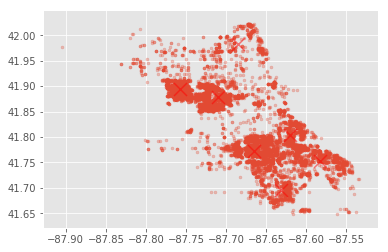

In [31]:
# Print & Plot your data
doKMeans(df1)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [34]:
df2 = df1[df1.Date > '2011-01-01']

[[-87.71049693  41.87507525]
 [-87.68522419  41.98536496]
 [-87.75477854  41.89006738]
 [-87.61774712  41.79199609]
 [-87.58017386  41.75049617]
 [-87.66411633  41.77626426]
 [-87.63524766  41.70513332]]


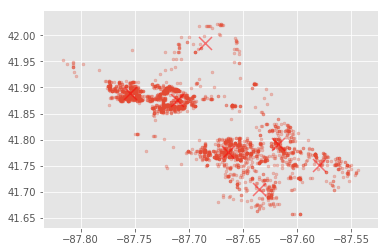

In [30]:
# Print & Plot your data
doKMeans(df2)

[[-87.71049693  41.87507525]
 [-87.68522419  41.98536496]
 [-87.75477854  41.89006738]
 [-87.61774712  41.79199609]
 [-87.58017386  41.75049617]
 [-87.66411633  41.77626426]
 [-87.63524766  41.70513332]]


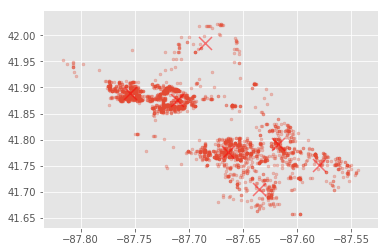

In [35]:
doKMeans(df2)